# Griddap usage in erddap-python

With ERDDAP_Griddap an user can connect to ERDDAP griddap datasets, extract all the metadata 
associated, and download subsets in all the different formats that ERDDAP offers, plus xarray
or netCDF4.Dataset output formats.

In [25]:
from erddapClient import ERDDAP_Server
from pprint import pprint
import pandas as pd 
import numpy as np


remoteServer = ERDDAP_Server('https://coastwatch.pfeg.noaa.gov/erddap')
print("ERDDAP Server version:")
print(remoteServer)


ERDDAP Server version:
<erddapClient.ERDDAP_Server>
Server version:  ERDDAP_version=2.11


In [26]:
searchResults = remoteServer.advancedSearch(searchFor="Gulf of Mexico -MODIS",
                                            minTime="2010-12-24T00:00:00Z",
                                            maxTime="2020-12-24T00:00:00Z")
print("Search results:")
searchResults

Search results:


<erddapClient.ERDDAP_SearchResults>
Results:  5
[
  0 - <erddapClient.ERDDAP_Griddap> hycom_gom310D , "NRL HYCOM 1/25 deg model output, Gulf of Mexico, 10.04 Expt 31.0, 2009-2014, At Depths"
  1 - <erddapClient.ERDDAP_Griddap> hycom_gom310S , "NRL HYCOM 1/25 deg model output, Gulf of Mexico, 10.04 Expt 31.0, 2009-2014, At Surface"
  2 - <erddapClient.ERDDAP_Griddap> ucsdHfrE1 , "Currents, HF Radar, US East Coast and Gulf of Mexico, RTV, Near-Real Time, 2012-present, Hourly, 1km"
  3 - <erddapClient.ERDDAP_Griddap> ucsdHfrE2 , "Currents, HF Radar, US East Coast and Gulf of Mexico, RTV, Near-Real Time, 2012-present, Hourly, 2km"
  4 - <erddapClient.ERDDAP_Griddap> ucsdHfrE6 , "Currents, HF Radar, US East Coast and Gulf of Mexico, RTV, Near-Real Time, 2012-present, Hourly, 6km"
]

In [27]:
# Show info about the first result
hycomgdap = searchResults[0]
print(hycomgdap)

<erddapClient.ERDDAP_Griddap>
Title:       NRL HYCOM 1/25 deg model output, Gulf of Mexico, 10.04 Expt 31.0, 2009-2014, At Depths
Server URL:  https://coastwatch.pfeg.noaa.gov/erddap
Dataset ID:  hycom_gom310D
Dimensions: 
  time (double) range=(cftime.DatetimeGregorian(2009, 4, 2, 0, 0, 0, 0), cftime.DatetimeGregorian(2014, 8, 30, 0, 0, 0, 0)) 
    Standard name: time 
    Units:         seconds since 1970-01-01T00:00:00Z 
  depth (float) range=(0.0, 5500.0) 
    Standard name: depth 
    Units:         m 
  latitude (float) range=(18.09165, 31.96065) 
    Standard name: latitude 
    Units:         degrees_north 
  longitude (float) range=(-98.0, -76.40002) 
    Standard name: longitude 
    Units:         degrees_east 
Variables: 
  temperature (float) 
    Standard name: sea_water_potential_temperature 
    Units:         degC 
  salinity (float) 
    Standard name: sea_water_practical_salinity 
    Units:         psu 
  u (float) 
    Standard name: eastward_sea_water_velocity 
  

## How to extract a subset, and get a xarray object

When calling the method .getxArray() this library will parse the query subset and calculate
the corresponding integer indexes to each dimensions, and then make the request to the opendap
with the appropiate indexes.


In [28]:
xSubset = ( hycomgdap.setResultVariables('temperature[(2014-06-15)][(0.0)][(18.09165):(31.96)][(-98):(-76.40002)]')
                     .getxArray() )
xSubset

<xarray.Dataset>
Dimensions:      (depth: 1, latitude: 385, longitude: 541, time: 1)
Dimensions without coordinates: depth, latitude, longitude, time
Data variables:
    temperature  (time, depth, latitude, longitude) float32 ...
Attributes:
    cdm_data_type:              Grid
    Conventions:                COARDS, CF-1.0, ACDD-1.3
    creator_email:              hycomdata@coaps.fsu.edu
    creator_name:               Naval Research Laboratory
    creator_type:               institution
    creator_url:                https://www.hycom.org
    defaultGraphQuery:          temperature[%28last%29][0][0:%28last%29][0:%2...
    Easternmost_Easting:        -76.40002
    experiment:                 31.0
    geospatial_lat_max:         31.96065
    geospatial_lat_min:         18.09165
    geospatial_lat_units:       degrees_north
    geospatial_lon_max:         -76.40002
    geospatial_lon_min:         -98.0
    geospatial_lon_resolution:  0.039999962962962966
    geospatial_lon_units:       degrees_east
    history:                    archv2ncdf3z\n2021-04-27T07:44:51Z https://td...
    infoUrl:                    https://www.hycom.org
    institution:                Naval Research Laboratory
    keywords:                   30.1h, circulation, currents, density, Earth ...
    keywords_vocabulary:        GCMD Science Keywords
    license:                    The data may be used and redistributed for fr...
    Northernmost_Northing:      31.96065
    source:                     HYCOM archive file
    sourceUrl:                  https://tds.hycom.org/thredds/dodsC/GOMl0.04/...
    Southernmost_Northing:      18.09165
    standard_name_vocabulary:   CF Standard Name Table v70
    summary:                    NRL HYCOM 1/25 deg model output, Gulf of Mexi...
    time_coverage_end:          2014-08-30T00:00:00Z
    time_coverage_start:        2009-04-02T00:00:00Z
    title:                      NRL HYCOM 1/25 deg model output, Gulf of Mexi...
    Westernmost_Easting:        -98.0

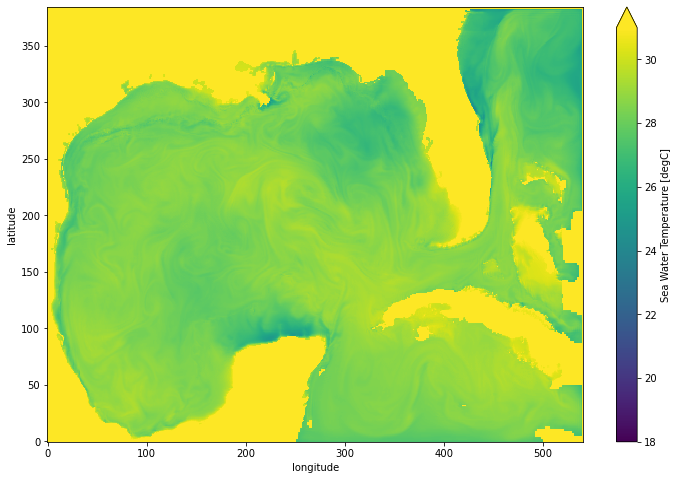

In [38]:
xSubset.temperature.plot(vmin=18,vmax=31)

### Show me the request URL, and the equivalente integer indexes 

In [30]:
print (hycomgdap.getDataRequestURL(filetype='opendap', useSafeURL=False))

https://coastwatch.pfeg.noaa.gov/erddap/griddap/hycom_gom310D?temperature[1900][0][0:384][0:540]


## Access to metadata information of dataset

Global, dimensions, and variables attributes

In [31]:
pprint(hycomgdap.info)

OrderedDict([('cdm_data_type', 'Grid'),
             ('Conventions', 'COARDS, CF-1.0, ACDD-1.3'),
             ('creator_email', 'hycomdata@coaps.fsu.edu'),
             ('creator_name', 'Naval Research Laboratory'),
             ('creator_type', 'institution'),
             ('creator_url', 'https://www.hycom.org'),
             ('defaultGraphQuery',
              'temperature[%28last%29][0][0:%28last%29][0:%28last%29]&.draw=surface&.vars=longitude|latitude|temperature'),
             ('Easternmost_Easting', -76.40002),
             ('experiment', '31.0'),
             ('geospatial_lat_max', 31.96065),
             ('geospatial_lat_min', 18.09165),
             ('geospatial_lat_units', 'degrees_north'),
             ('geospatial_lon_max', -76.40002),
             ('geospatial_lon_min', -98.0),
             ('geospatial_lon_resolution', 0.039999962962962966),
             ('geospatial_lon_units', 'degrees_east'),
             ('history', 'archv2ncdf3z'),
             ('infoUrl', 'https:

In [32]:
print(hycomgdap.dimensions)
# This library parses the griddap dimension information, provided in the form
# sample: nValues=16, evenlySpaced=false, averageSpacing=91 days 6h 24m 0s 
# And include this values in _nValues, _evenlySpaced, _averageSpacing attributes

<erddapClient.ERDDAP_Griddap_dimensions>
Dimension: time (nValues=1977) 
Dimension: depth (nValues=40) 
Dimension: latitude (nValues=385) 
Dimension: longitude (nValues=541) 


In [33]:
pprint(hycomgdap.variables)
# This dictionary includes the variable metadata

OrderedDict([('temperature',
              {'_FillValue': 1.267651e+30,
               '_dataType': 'float',
               'colorBarMaximum': 32.0,
               'colorBarMinimum': 0.0,
               'ioos_category': 'Temperature',
               'long_name': 'Sea Water Temperature',
               'standard_name': 'sea_water_potential_temperature',
               'units': 'degC',
               'valid_range': (2.6549964, 28.802729)}),
             ('salinity',
              {'_FillValue': 1.267651e+30,
               '_dataType': 'float',
               'colorBarMaximum': 37.0,
               'colorBarMinimum': 32.0,
               'ioos_category': 'Salinity',
               'long_name': 'Sea Water Practical Salinity',
               'standard_name': 'sea_water_practical_salinity',
               'units': 'psu',
               'valid_range': (0.33169016, 38.789318)}),
             ('u',
              {'_FillValue': 1.267651e+30,
               '_dataType': 'float',
               '

## How to make request to the graphics engine of ERDDAP


https://coastwatch.pfeg.noaa.gov/erddap/griddap/hycom_gom310D.png?temperature[(2009-04-02)][(0.0)][][]


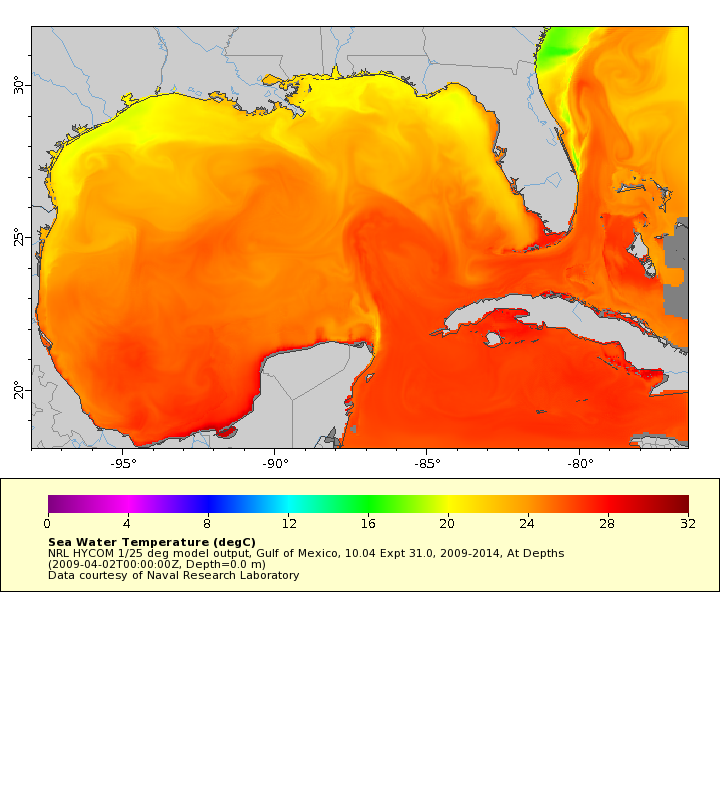

In [34]:
# Request a PNG Plot

from IPython.display import Image

hycomgdap.clearQuery()
surfacePlot = (
    hycomgdap.setResultVariables("temperature[(2009-04-02)][(0.0)][][]")
    .addConstraint(".draw=surface")
    .addConstraint(".vars=longitude|latitude|temperature")
    .addConstraint(".colorBar=|||15|29|")
)
# Reference for graphic commands in ERDDAP
# https://coastwatch.pfeg.noaa.gov/erddap/tabledap/documentation.html#GraphicsCommands

print(surfacePlot.getURL('png', useSafeURL=False))
Image(data=surfacePlot.getData('largePng'))

URL request: https://coastwatch.pfeg.noaa.gov/erddap/griddap/hycom_gom310D.csvp?temperature%5B0%3Alast%5D%5B%280.0%29%5D%5B%2822.5%29%5D%5B%28-95.5%29%5D%2Csalinity%5B0%3Alast%5D%5B%280.0%29%5D%5B%2822.5%29%5D%5B%28-95.5%29%5D


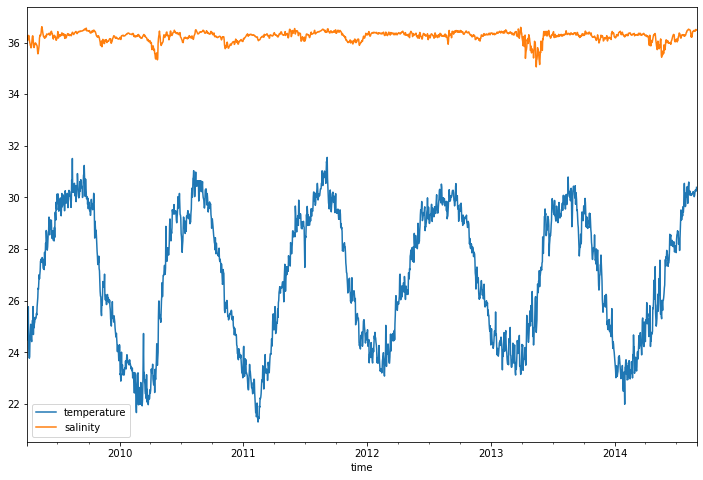

In [35]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

# Request a time series data from location

hycomgdap.clearQuery()
request = ( hycomgdap.setResultVariables(["temperature[0:last][(0.0)][(22.5)][(-95.5)]",
                                           "salinity[0:last][(0.0)][(22.5)][(-95.5)]"])
                      .getURL() )

print ("URL request: %s" % request)

tsdf = (
    hycomgdap.getDataFrame(header=0, 
                           names=["time", "depth", "latitude", "longitude", "temperature", "salinity"], 
                           parse_dates=["time"],
                           index_col="time")
)

tsdf.plot(y=['temperature','salinity'])


In [36]:
# Request the dataset as an xarray object
#
print(hycomgdap.xarray)

<xarray.Dataset>
Dimensions:      (depth: 40, latitude: 385, longitude: 541, time: 1977)
Coordinates:
  * time         (time) datetime64[ns] 2009-04-02 2009-04-03 ... 2014-08-30
  * depth        (depth) float32 0.0 5.0 10.0 15.0 ... 4.5e+03 5e+03 5.5e+03
  * latitude     (latitude) float32 18.09 18.13 18.17 ... 31.89 31.93 31.96
  * longitude    (longitude) float32 -98.0 -97.96 -97.92 ... -76.48 -76.44 -76.4
Data variables:
    temperature  (time, depth, latitude, longitude) float32 ...
    salinity     (time, depth, latitude, longitude) float32 ...
    u            (time, depth, latitude, longitude) float32 ...
    v            (time, depth, latitude, longitude) float32 ...
    w_velocity   (time, depth, latitude, longitude) float32 ...
Attributes:
    cdm_data_type:              Grid
    Conventions:                COARDS, CF-1.0, ACDD-1.3
    creator_email:              hycomdata@coaps.fsu.edu
    creator_name:               Naval Research Laboratory
    creator_type:               

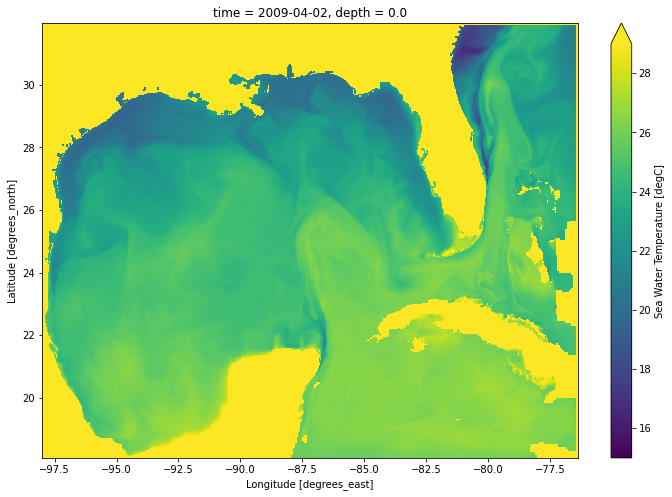

In [37]:
# Map plot out of a data slice with xarray

hycomgdap.xarray.temperature[0,0,:,:].plot(vmin=15,vmax=29)